#### 1. La formule permettant d’estimer le nombre de coefficients d’un filtre RIF en fonction d’un gabarit est rappelée ci-dessous, dans le cas d’une fenêtre rectangulaire. Déterminer le nombre de coefficients nécessaires pour qu’un filtre RIF respecte les contraintes données par le gabarit précédent.

In [1]:
import math


v1 = 0.15
v2 = 0.20
F = v2 - v1
Fe = 1 

delta1 = (10 ** (-3/20))
delta2 = (10 ** (-40/20))
delta = v2 - v1

M = math.ceil(2/delta * math.log(1/(10*delta1*delta2)) / math.log(10))

M

46

#### 2.Déterminer par le calcul les coefficients d’un filtre RIF obtenus par la méthode de la fenêtre

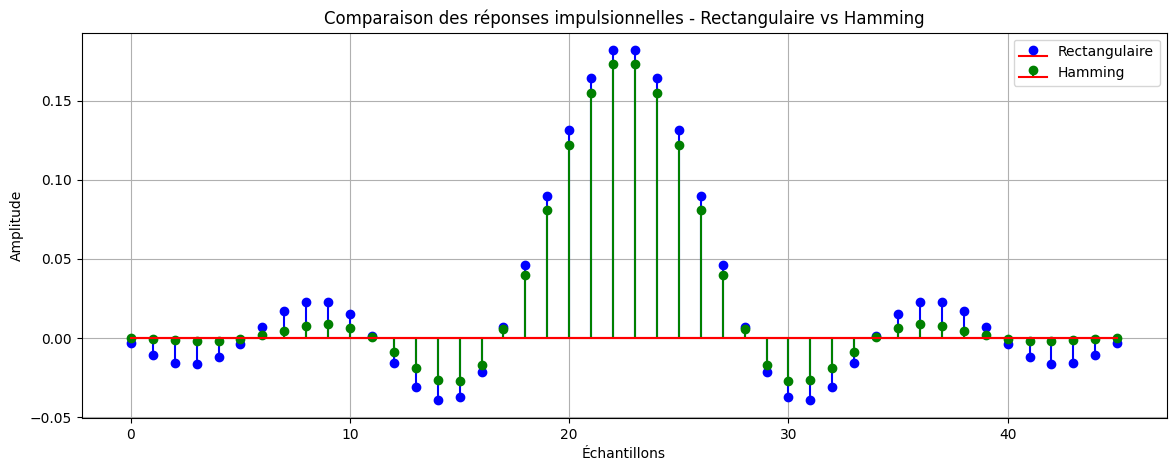

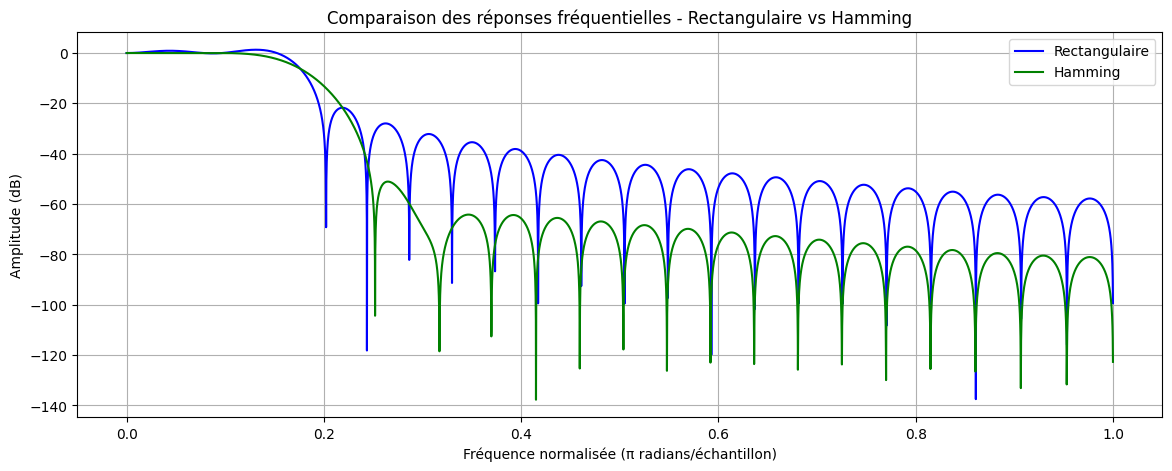

In [2]:
from scipy.signal import firwin, freqz, hamming
import numpy as np
import matplotlib.pyplot as plt

fc = (v1 + v2) / 2  

coeffs_rect_window = firwin(numtaps=M, cutoff=fc, window='boxcar', pass_zero='lowpass')
coeffs_hamming_window = firwin(numtaps=M, cutoff=fc, window='hamming', pass_zero='lowpass')

plt.figure(figsize=(14, 5))
plt.stem(coeffs_rect_window, linefmt='b', markerfmt='bo', basefmt='r-', label='Rectangulaire')
plt.stem(coeffs_hamming_window, linefmt='g', markerfmt='go', basefmt='r-', label='Hamming')
plt.title("Comparaison des réponses impulsionnelles - Rectangulaire vs Hamming")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

w_rect, h_rect = freqz(coeffs_rect_window, worN=8000)
w_ham, h_ham = freqz(coeffs_hamming_window, worN=8000)

plt.figure(figsize=(14, 5))
plt.plot(w_rect / np.pi, 20 * np.log10(abs(h_rect)), 'b', label='Rectangulaire')
plt.plot(w_ham / np.pi, 20 * np.log10(abs(h_ham)), 'g', label='Hamming')
plt.title("Comparaison des réponses fréquentielles - Rectangulaire vs Hamming")
plt.xlabel("Fréquence normalisée (π radians/échantillon)")
plt.ylabel("Amplitude (dB)")
plt.legend()
plt.grid(True)
plt.show()


#### 3.Comparer les résultats obtenus à ceux donnés par la fonction firwin de scipy.signal. Quelle est la fenêtre utilisée par défaut par firwin ?

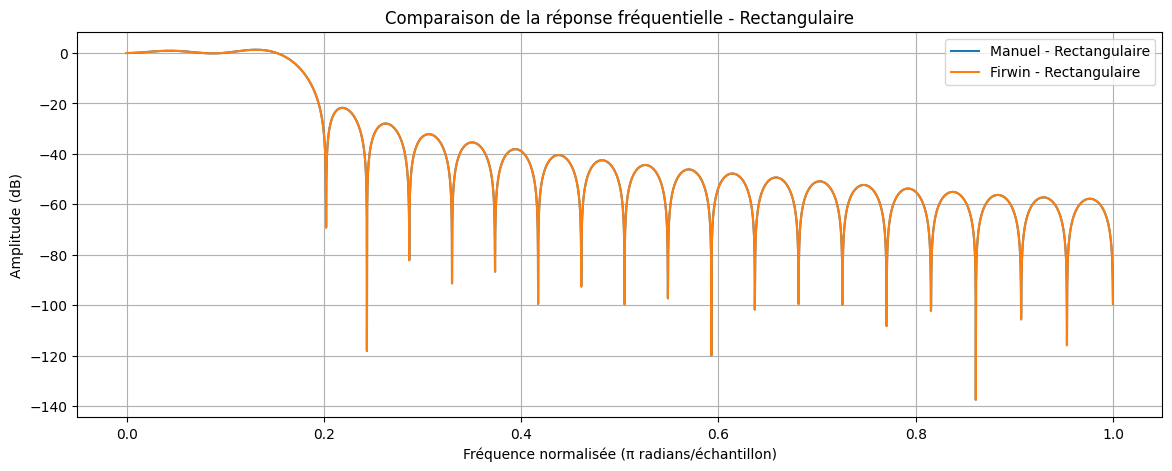

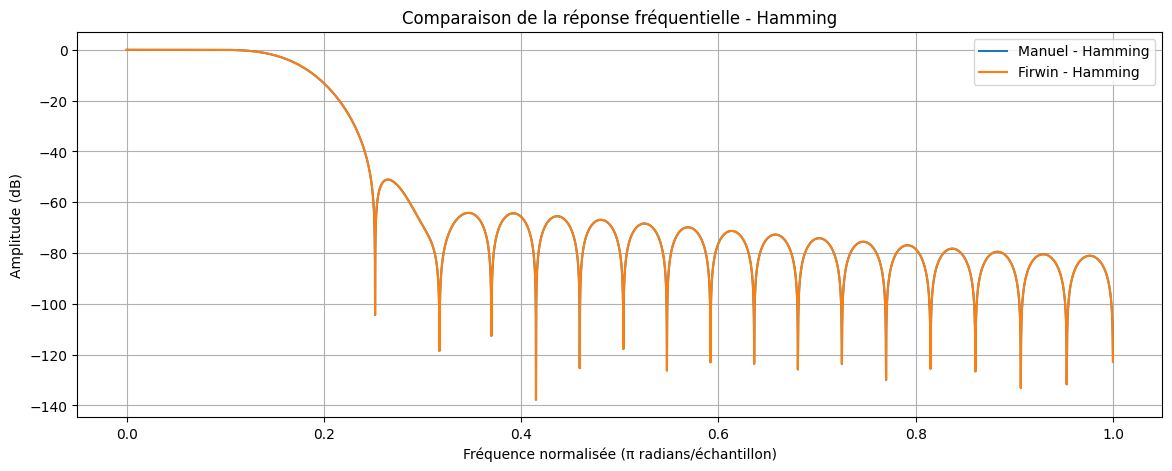

In [3]:
coeffs_firwin_rect = firwin(numtaps=M, cutoff=fc, window='boxcar', pass_zero='lowpass')
coeffs_firwin_hamming = firwin(numtaps=M, cutoff=fc, window='hamming', pass_zero='lowpass')


w_firwin_rect, h_firwin_rect = freqz(coeffs_firwin_rect, worN=8000)
w_firwin_hamming, h_firwin_hamming = freqz(coeffs_firwin_hamming, worN=8000)

plt.figure(figsize=(14, 5))
plt.plot(w_rect / np.pi, 20 * np.log10(abs(h_rect)), label='Manuel - Rectangulaire')
plt.plot(w_firwin_rect / np.pi, 20 * np.log10(abs(h_firwin_rect)), label='Firwin - Rectangulaire')
plt.title("Comparaison de la réponse fréquentielle - Rectangulaire")
plt.xlabel("Fréquence normalisée (π radians/échantillon)")
plt.ylabel("Amplitude (dB)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(w_ham / np.pi, 20 * np.log10(abs(h_ham)), label='Manuel - Hamming')
plt.plot(w_firwin_hamming / np.pi, 20 * np.log10(abs(h_firwin_hamming)), label='Firwin - Hamming')
plt.title("Comparaison de la réponse fréquentielle - Hamming")
plt.xlabel("Fréquence normalisée (π radians/échantillon)")
plt.ylabel("Amplitude (dB)")
plt.legend()
plt.grid(True)
plt.show()


### 4. Tester les 4 filtres obtenus sur différents signaux ayant des composantes fréquentielles acceptables et d’autres non, qui mettent en avant les propriétés spectrales des filtres

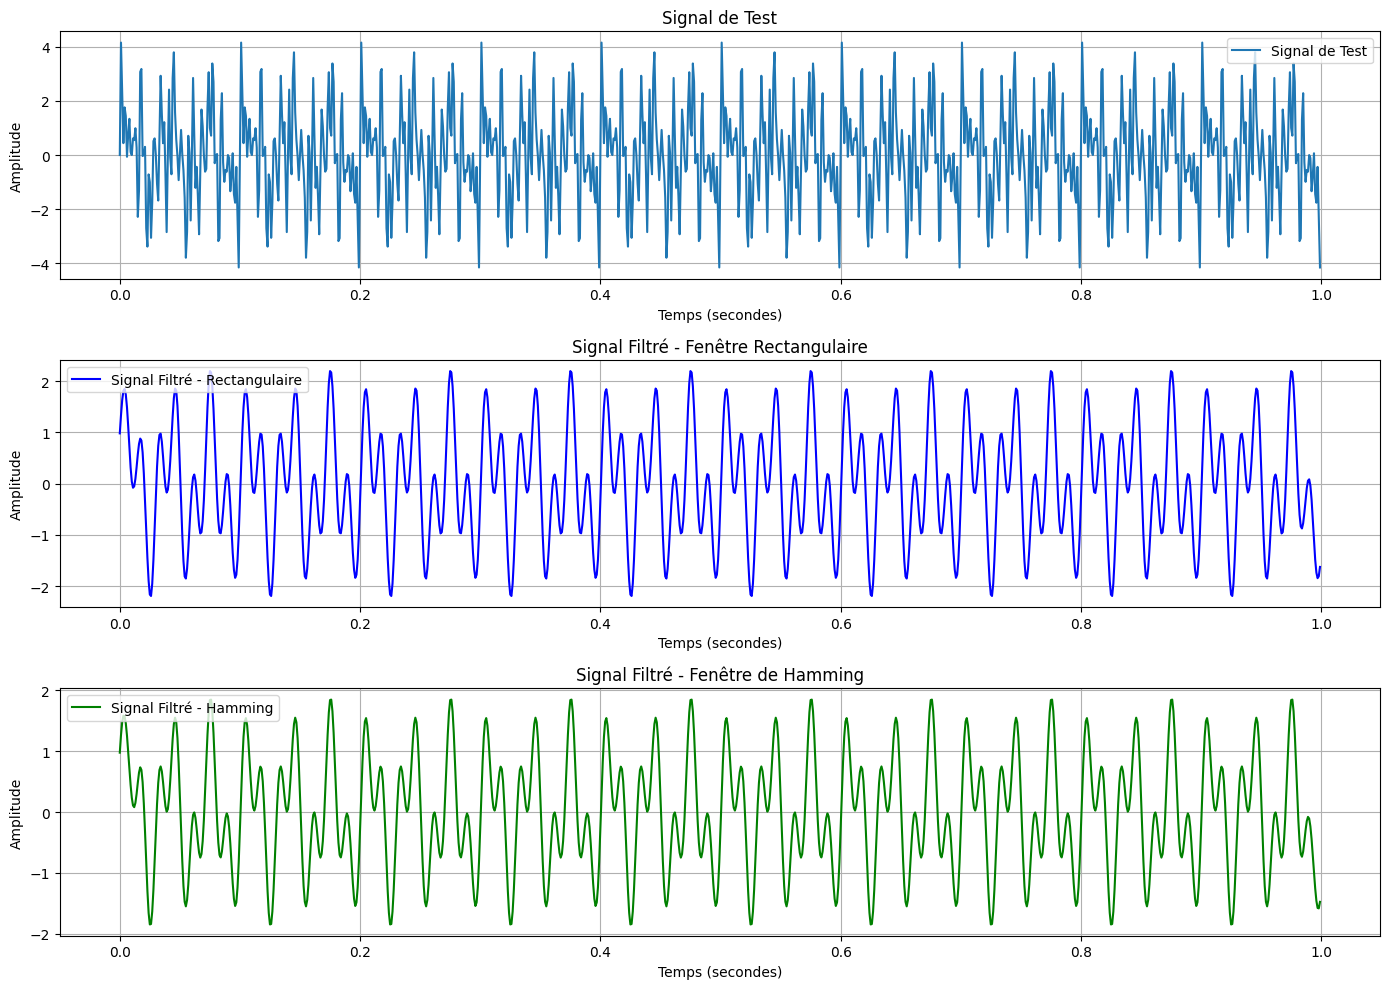

In [8]:
fs = 1000  
t = np.linspace(0, 1, fs, endpoint=False) 
frequencies = [30, 70, 120, 180, 250, 300]
signal_test = sum(np.sin(2 * np.pi * f * t) for f in frequencies)
filtered_test_rect = np.convolve(signal_test, coeffs_rect_window, mode='same')
filtered_test_hamming = np.convolve(signal_test, coeffs_hamming_window, mode='same')

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(t, signal_test, label='Signal de Test')
plt.title("Signal de Test")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, filtered_test_rect, label='Signal Filtré - Rectangulaire', color='blue')
plt.title("Signal Filtré - Fenêtre Rectangulaire")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, filtered_test_hamming, label='Signal Filtré - Hamming', color='green')
plt.title("Signal Filtré - Fenêtre de Hamming")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
